## Analyse du rendement d'une production de blés

Le but du projet est de réaliser une ANOVA sur un facteur puis sur deux facteurs.

Pour l'analyse à un facteur je réalise les calculs à partir de ma propre classe. Je retrouve les mêmes valeurs f-stats et p-value que StatsModels.

Pour l'analyse à deux facteurs, j'utilise également ma propre classe, mais qui est principalement un wrapper basé sur StatsModels.

## A propos de l'analyse à deux facteurs

Tutoriel Python : https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

---

## Import des librairires

In [1]:
import pandas as pd
import numpy as np

from descstats import Biva
from modelstats import OWAnova
from modelstats import TWAnova

## Import des données

Source : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754130-decouvrez-le-jeu-de-donnees-du-ble

In [2]:
df = pd.read_csv("data/culture-ble.txt", sep=";")
display(df.head(10))

,parcelle,variete,phyto,rdt
0,1,V1,Avec,5652
1,2,V1,Avec,5583
2,3,V1,Avec,5612
3,4,V1,Avec,5735
4,5,V1,Avec,5704
5,6,V1,Avec,5544
6,7,V1,Avec,5563
7,8,V1,Avec,5610
8,9,V1,Avec,5641
9,10,V1,Avec,5637


## Analyses descriptives

Réalisées à l'aide de ma propre classe Biva()

Eta Squared (η2): 0.45


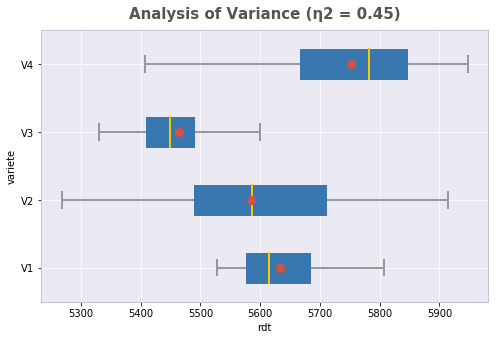

In [3]:
mybv1 = Biva(df['variete'], df['rdt'], type_x='quali', type_y='quanti')
mybv1.describe()
mybv1.anova()

Eta Squared (η2): 0.00


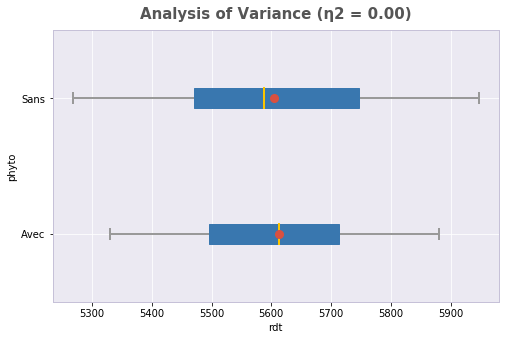

In [4]:
mybv2 = Biva(df['phyto'], df['rdt'], type_x='quali', type_y='quanti')
mybv2.describe()
mybv2.anova()

## ANOVA à un facteur

### Rendement en fonction de la variété

In [5]:
myanov1 = OWAnova(df['variete'], df['rdt'])
myanov1.summary()

,mean,alpha,ni
V1,5633.8,0.0,20
V2,5584.1,-49.7,20
V3,5464.6,-169.2,20
V4,5752.2,118.4,20


,Eta Squared,F-Stat,P-Value
0,0.447578,20.525327,7.674413e-10


### Interprétation

La pvalue est extrêmement faible, on valide donc la significativité de la variété sur le rendement.

L'eta carré est de 0,44%.

### Utilisation de pesticide

In [6]:
myanov2 = OWAnova(df['phyto'], df['rdt'])
myanov2.summary()

,mean,alpha,ni
Avec,5612.225,0.0,40
Sans,5605.125,-7.1,40


,Eta Squared,F-Stat,P-Value
0,0.00053,0.041341,0.839411


### Interprétation

La pvalue est de 0,8. On ne rejète donc pas H0, l'influence des pesticides sur le rendement des parcelles n'est pas significatif.

---

## ANOVA à deux facteurs

Nous allons tester si le couple "variété / phyto" a une influence sur le rendement.

In [7]:
mya = TWAnova(df, 'variete', 'phyto', 'rdt')
mya.aov_table

,sum_sq,df,F,PR(>F),eta_sq
C(variete),851844.55,3.0,19.574935,2.205108e-09,0.447578
C(phyto),1008.20,1.0,0.069504,7.928138e-01,0.000530
C(variete):C(phyto),5968.20,3.0,0.137146,9.375236e-01,0.003136
Residual,1044410.60,72.0,NaN,NaN,NaN


La p-valeur est de 0,93. On ne rejète donc pas l'hypothèse nulle. Le couple variété / phyto n'a pas d'influence significative sur le rendement.

In [8]:
# 17:30
# Régression logistique : mettre au propre dans un tableau mes résumés
# Régression logistique : regarder pourquoi le summary() ne s'affiche pas